## 1.4.10 Histograms in OpenCV

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
img = cv2.imread('170421_dog01.png',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [11]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
print(np.transpose(hist))

[[17439.   798.   481.   595.   337.   308.   297.   203.   355.   136.
    153.   314.   294.   271.   412.   307.   287.   324.   287.   358.
    392.   322.   455.   402.   221.   120.   377.   401.   525.   950.
    371.   890.   671.  1168.   786.  2026.  1796.  1687.  1196.  2197.
   2038.  3731.  1776.  4278.  5417.   981.  4506.  4589.  6268.  8172.
   5200.  2027.  9482.  8863.  6476.  8785.  2691.  9161.  4015.  8661.
   6775.  5319.  4255.  3183.  5264.  6877.  3805.  4926.  8041.  1559.
   6538.  3164.  3655.  2290.  5440.  2357.  2399.  3659.  3964.  4450.
   1968.  2022.  3086.  2507.  1789.  2158.  2018.  2452.  1493.  1810.
   1602.  1684.  1397.  1714.  1775.  1775.  1435.  1534.  1418.  1366.
   1617.  1496.  1476.  1475.  1293.  1424.  1540.  1518.  1485.  1524.
   1379.  1230.  1448.  1254.  1362.  1249.  1245.   990.  1136.   871.
   1127.  1373.  1058.  1168.   957.  1102.  1267.  1164.  1080.  1086.
    969.  1233.  1021.  1264.   908.   802.   776.   515.   742.

In [4]:
hist = np.bincount(img.ravel(),minlength=256)

In [5]:
from matplotlib import pyplot as plt

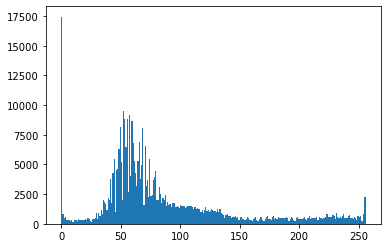

In [6]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

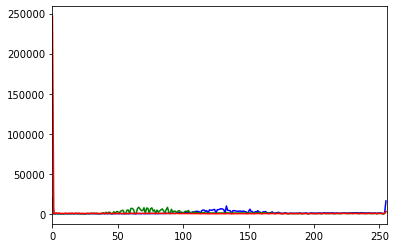

In [14]:
img = cv2.imread('170421_dog01.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

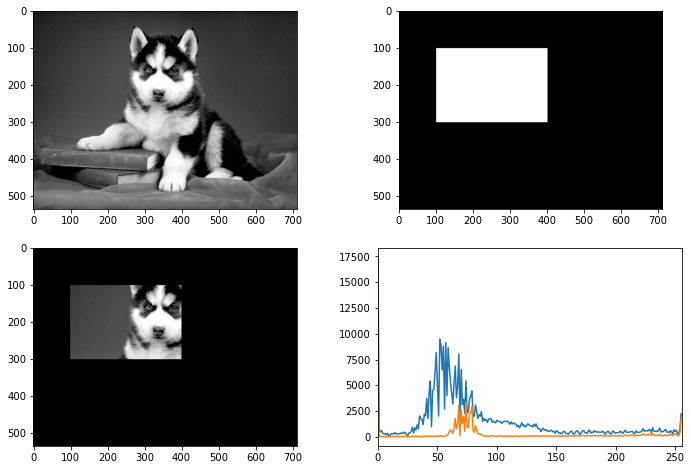

In [15]:
img = cv2.imread('170421_dog01.png',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

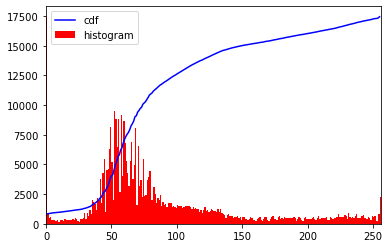

In [16]:
img = cv2.imread('170421_dog01.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [17]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

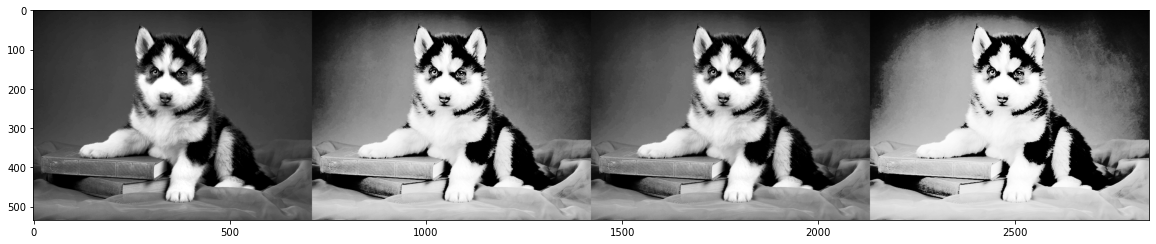

In [25]:
img = cv2.imread('170421_dog01.png',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.figure(figsize=(20,20))
plt.imshow(res,"gray")
plt.show()

True